# USING ``controlSBML``

## Preliminaries

In [1]:
import controlSBML as ctl

import control
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ControlSBML Objects

## Construction ``ControlSBML``

In [2]:
# From a URL
CTLSB_MTOR = ctl.ControlSBML(
    "https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000823.2?filename=Varusai2018.xml",
    input_names=["v1", "v11"], output_names=["mTORC1_DEPTOR", "mTORC2_DEPTOR"])

In [3]:
SIMPLE_MODEL = """
J1: S1 -> S2; S1
S1 = 10; S2 = 0;
"""

In [4]:
# From an antimony string
CTLSB_SIMPLE = ctl.ControlSBML(SIMPLE_MODEL, input_names=["J1"], output_names=["S2"])

## Properties

In [5]:
# Print the first few lines of the antimony representation of this model
print(CTLSB_MTOR.antimony)

// Created by libAntimony v2.12.0
function Constant_flux__irreversible(v)
  v;
end

Constant_flux__irreversible is "Constant flux (irreversible)"

function Henri_Michaelis_Menten__irreversible(substrate, Km, V)
  V*substrate/(Km + substrate);
end

Henri_Michaelis_Menten__irreversible is "Henri-Michaelis-Menten (irreversible)"

function HMM_Mod(V, s, m, Km)
  V*s*m/(Km + s);
end

HMM_Mod is "HMM_Mod"

function Function_for_v11(k11ca, pmTORC1, DEPTOR, Km11a, pDEPTOR, k11cb, pmTORC2, Km11b)
  k11ca*pmTORC1*DEPTOR/(Km11a + pDEPTOR) + k11cb*pmTORC2*DEPTOR/(Km11b + DEPTOR);
end

Function_for_v11 is "Function_for_v11"

function Function_for_v5(k5ca, pIRS, Akt, Km5a, k5cb, pmTORC2, Km5b)
  k5ca*pIRS*Akt/(Km5a + Akt) + k5cb*pmTORC2*Akt/(Km5b + Akt);
end

Function_for_v5 is "Function_for_v5"


model *Varusai2018___Dynamic_modelling_of_the_mTOR_signalling_network_reveals_complex_emergent_behaviours_conferred_by_DEPTOR()

  // Compartments and Species:
  compartment compartment_;
  species IR in c

In [6]:
CTLSB_MTOR.state_names

['pIR',
 'IRS',
 'pIRS',
 'Akt',
 'mTORC1',
 'pmTORC1',
 'mTORC2',
 'pmTORC2',
 'DEPTOR',
 'pDEPTOR']

In [7]:
CTLSB_MTOR.jacobian_df

,DEPTOR,IRS,mTORC1,mTORC2,pDEPTOR,Akt,pIR,pIRS,pmTORC1,pmTORC2
DEPTOR,-1.65,0.00,-0.356,-2.456,0.571429,0.000000,0.000000,0.000000,-0.297667,-0.132039
IRS,0.00,-0.02,0.000,0.000,0.000000,0.000000,-0.066667,0.000000,-0.066667,0.000000
mTORC1,-0.25,0.00,-0.356,0.000,0.000000,0.099206,0.000000,0.000000,5.994000,0.000000
mTORC2,-1.40,0.00,0.000,-2.456,0.000000,0.000000,-0.166667,0.000000,0.000000,0.422571
pDEPTOR,0.00,0.00,0.000,0.000,-0.571429,0.000000,0.000000,0.000000,0.291667,0.126039
Akt,0.00,0.00,0.000,0.000,0.000000,-0.058824,0.000000,-0.046729,0.000000,-1.442308
pIR,0.00,0.00,0.000,0.000,0.000000,0.000000,-0.033090,0.000000,0.000000,0.000000
pIRS,0.00,0.00,0.000,0.000,0.000000,0.000000,0.066667,-0.020000,0.000000,0.000000
pmTORC1,0.00,0.00,0.000,0.000,0.000000,-0.099206,0.000000,0.000000,-6.000000,0.000000
pmTORC2,0.00,0.00,0.000,0.000,0.000000,0.000000,0.166667,0.000000,0.000000,-0.428571


In [8]:
# State vector at current time
CTLSB_MTOR.state_ser

pIR          0.0
IRS        100.0
pIRS         0.0
Akt        100.0
mTORC1     250.0
pmTORC1      0.0
mTORC2     200.0
pmTORC2      0.0
DEPTOR     350.0
pDEPTOR      0.0
dtype: float64

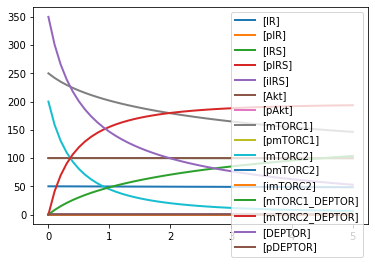

In [9]:
# Run a roadrunner simulation
data = CTLSB_MTOR.roadrunner.simulate()
CTLSB_MTOR.roadrunner.plot(data)

In [10]:
data["[mTORC1_DEPTOR]"]

array([  0.        ,   7.97532933,  14.71919234,  20.56435101,
        25.72431853,  30.34421942,  34.5271093 ,  38.34882709,
        41.86679949,  45.12555884,  48.16036123,  50.99958259,
        53.6664095 ,  56.18004694,  58.5565766 ,  60.80960868,
        62.9507778 ,  64.99010037,  66.93625713,  68.79683659,
        70.5785132 ,  72.28718335,  73.92808406,  75.50589417,
        77.02481548,  78.48863252,  79.90076566,  81.26431401,
        82.58209794,  83.85669513,  85.09047047,  86.28559611,
        87.44406995,  88.56773538,  89.65829864,  90.71734332,
        91.74634223,  92.74666525,  93.71958884,  94.66630613,
        95.58793483,  96.48552329,  97.36005591,  98.21245693,
        99.04359636,  99.85429526, 100.64532924, 101.41743117,
       102.17129425, 102.90757476, 103.62689509])

## Methods

In [11]:
# Change the simulation time
CTLSB_MTOR.setTime(2)
CTLSB_MTOR.state_ser

pIR          0.667559
IRS         99.955594
pIRS         0.044387
Akt         99.962699
mTORC1     179.420968
pmTORC1      0.000516
mTORC2      20.129355
pmTORC2      0.027063
DEPTOR      99.575651
pDEPTOR      0.002250
dtype: float64

A state space representation has the form:
* $\dot{{\bf x}} = {\bf A} {\bf x} + {\bf B} {\bf u}$
* ${\bf y} = {\bf C} {\bf x}$

Below is described the elements of this representation for SBML models. 
This is displayed as 4 sub-matrics: ${\bf A}$ is upper left, ${\bf B}$ is upper right, ${\bf C}$ is lower left, and ${\bf D}$ is lower right.

In [12]:
# Create a state space model using the Jacobian at the current time
state_space = CTLSB_SIMPLE.makeStateSpace()
state_space

StateSpace(array([[-1.]]), array([[-1.]]), array([[-1.]]), array([[0.]]))

In [13]:
# Create a NonlinearIOSystem object that can be used in creating InterconnectedSystems
# An effector_dct maps the input (a reaction flux) to a chemical species that can be manipulated
effector_dct = {"v1": "IR", "v11": "DEPTOR"}
non_linear_mtor = CTLSB_MTOR.makeNonlinearIOSystem("mtor", effector_dct=effector_dct)

# Other Objects and Functions

In [14]:
## Simulating a system
non_linear_mtor = CTLSB_MTOR.makeNonlinearIOSystem("mtor")
# Simulate the system using as it is specified in the simulation. Note the warning messages.
ts = ctl.simulateSystem(non_linear_mtor)

***Warning***

   System mtor: Input v1 cannot be set. Ignored.
***Warning***

   System mtor: Input v11 cannot be set. Ignored.


In [15]:
# The output is a Timeseries. This is a dataframe where the index is time in milliseconds
ts.head()

,mTORC1_DEPTOR,mTORC2_DEPTOR
miliseconds,,
0,0.000000,0.000000
100,7.976238,40.630475
200,14.719418,69.200285
300,20.563877,90.242212
400,25.726158,106.399542


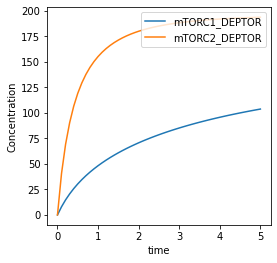

In [16]:
# We can plot any Timeseries object. Various options are available for the plot
ctl.plotOneTS(ts, ylabel="Concentration", figsize=(4,4))

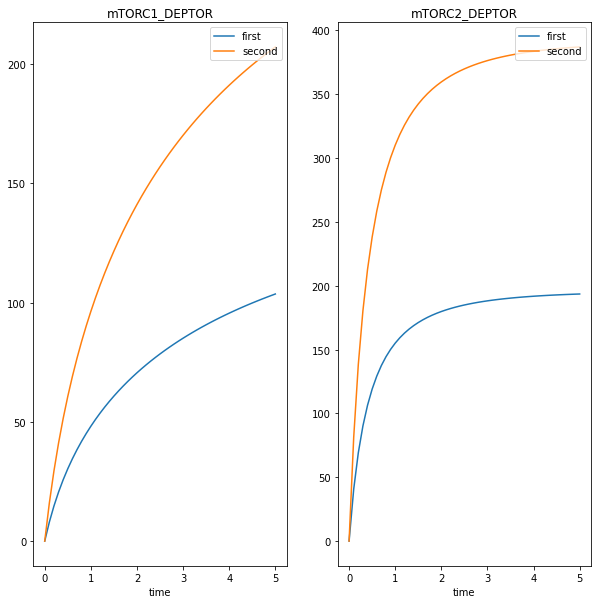

In [17]:
# We can also plot multiple Time Series
df = ts.copy()  # Create a DataFrame from the Timeseries
for col in df.columns:
    df[col] = 2*ts[col]  # Create new values in the DataFrame
ts2 = ctl.Timeseries(df)  # Make a Timeseries from the DataFrame
ctl.plotManyTS(ts, ts2, ncol=2, names=["first", "second"])

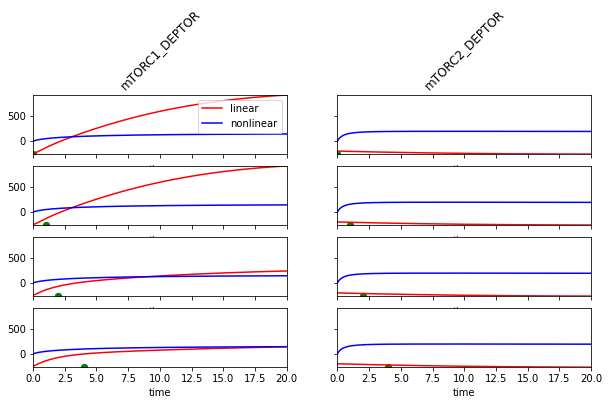

In [18]:
# Compare the linear approximation using the Jacobian at different times with the true model
# The dot on the x-axis shows the timepoint of the Jacobian
CTLSB_MTOR.plotAccuracy(step_val=0, timepoints=[0, 1, 2, 4], figsize=(10, 5), xlabel="time", end_time=20)

# Constructing Feedback Systems

## mTOR System

<img src="images/mTOR-network.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

We use the CalTech ``control`` package to analyze and design control systems.
This is why ``ControlSBML`` has a method to create a ``StateSpace`` object (``makeStateSpace``) and
a ``NonlinearIOSystem`` object (``makeNonlinearIOSystem``).
Below, we show how to construct a PI controller.
To avoid excessive "windup", we hae a threshold on the control error.

In the following, the control objective is to regulate mTORC1_DEPTOR.
This is done b controlling phosphorylated Akt (pAkt),
which has an *inverse* effect on mTORC1_DEPTOR.

The implementation has 3 parts:

* The mTOR system. See ``mtor`` below. This has the input ``v6`` that controls the conversion of pAkt to Akt
and the outputs TORC1_DEPTOR, pAkt.
* The controller, ``controller``. This is a proportional controller that calculates the difference between
the reference value of TORC1_DEPTOR in ``xeq`` and the measured value that is output from ``mtor``.
* The closed loop system, ``closed``, that describes the connections between the mTOR system and the controller.

In [19]:
ctlsb = ctl.ControlSBML("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000823.2?filename=Varusai2018.xml",
                       input_names=["v6"], output_names=["mTORC1_DEPTOR", "pAkt"])
effector_dct = {"v6": "pAkt"}
mtor = ctlsb.makeNonlinearIOSystem("mtor", effector_dct=effector_dct)

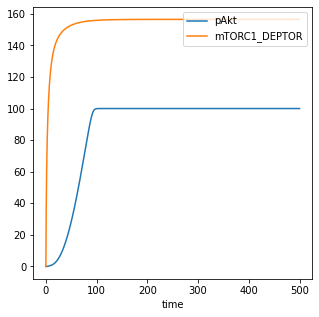

In [20]:
# Uncontrolled system
ctl.plotOneTS(ctl.simulateSystem(mtor, end_time=500), figsize=(5,5))

In [21]:
# State at which system will be regulated
ctlsb.setTime(4.5)
mtor_initial_state = ctlsb.state_ser.values
ctlsb.state_ser

pIR          1.444095
IRS         99.784581
pIRS         0.215162
Akt         99.835887
mTORC1     150.143156
pmTORC1      0.002549
mTORC2       7.143008
pmTORC2      0.039623
DEPTOR      57.322228
pDEPTOR      0.006108
dtype: float64

## Controller

In [22]:
xeq = [100]  # Desired concentration for mTORC1_DEPTOR
def outfcn(t, x, u, _):
    # State is accumulated error
    new_err = xeq[0] - u[0]
    return -30*new_err
controller = control.NonlinearIOSystem(
  None,
  outfcn,
  inputs=['in'],
  outputs=['out'], name='controller')

## InterconnectSystem

In [23]:
xeq = [100]  # Desired concentration for mTORC1_DEPTOR
def outfcn(t, x, u, _):
    # State is accumulated error
    new_err = xeq[0] - u[0]
    return -30*new_err
controller = control.NonlinearIOSystem(
  None,
  outfcn,
  inputs=['in'],
  outputs=['out'], name='controller')

In [24]:
# Create the closed loop system
closed_outputs = list(mtor.outlist)
closed_outputs.append('controller.out')
#closed_outputs.append("controller.out")  # Make this visible as well
mtor_closed = control.interconnect(
  [mtor, controller],       # systems
  connections=[
    ['mtor.v6', 'controller.out'],
    ['controller.in',  'mtor.mTORC1_DEPTOR'],
  ],
  inplist=["controller.in"],
  outlist=closed_outputs,
)

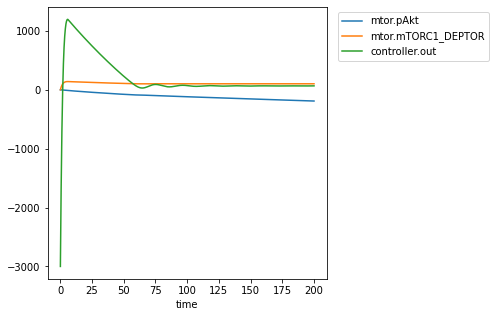

In [25]:
initial_x_vec = ctl.makeStateVector(mtor_closed)
ts = ctl.simulateSystem(mtor_closed, output_names=closed_outputs, initial_x_vec=initial_x_vec, end_time=200)
ctl.plotOneTS(ts, figsize=(5,5), legend_crd=(1.6, 1))

Recall that the uncontrolled system had mTORC1_DEPTOR equal to 150. The closed loop system regulates this to 100, as desired.

## Notes and Comments

Some considerations in control analysis:
* Choose appropriate inputs regulate in the system under control and appropriate effectors for those inputs.
* Make sure that you use the correct directional change for how the control error impacts the measured output.
If the closed loop system is unstable, you likely have used the wrong direction.
* If you use the state update function (``updfcn``), remember that the output is the derivative of the new state.

# Explore

In [26]:
ctlsb = ctl.ControlSBML("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000843.9?filename=Dudziuk2019.xml")

In [27]:
print(ctlsb.antimony)

// Created by libAntimony v2.12.0
function Constant_flux__irreversible(v)
  v;
end

Constant_flux__irreversible is "Constant flux (irreversible)"

function Function_for_HSP_Translation(k4, mRNA)
  k4*mRNA;
end

Function_for_HSP_Translation is "Function_for_HSP_Translation"

function Function_for_mRNA_Transcription(k_8_T, HSE_HSF_3)
  k_8_T*HSE_HSF_3;
end

Function_for_mRNA_Transcription is "Function_for_mRNA_Transcription"

function Function_for_HSF_Activation(k3, HSF)
  k3*HSF^3;
end

Function_for_HSF_Activation is "Function_for_HSF_Activation"


model *Dudziuk2019___Biologically_sound_formal_model_of_Hsp70_heat_induction()

  // Compartments and Species:
  compartment compartment_;
  species HSP in compartment_, HSF in compartment_, S in compartment_, HSP_HSF in compartment_;
  species HSP_S in compartment_, HSF_3 in compartment_, HSE in compartment_;
  species HSE_HSF_3 in compartment_, P in compartment_, mRNA in compartment_;

  // Assignment Rules:
  I_7_T := ModelValue_13;
  k_8_